In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
Annual_Gold_Value_In_Yen = pd.read_csv('Resources/output_Annual_Gold_Value_In_Yen.csv')
Inflation_rates_2013_2021 = pd.read_csv('Resources/inflation_rates_2013-2021.csv')

Yen_inflation = Inflation_rates_2013_2021[Inflation_rates_2013_2021['country'] == 'China']


In [25]:
def calculate_percent_change(data, year_column, value_column):
    percent_change = {}
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        print(f"old_value: {old_value}, new_value: {new_value}")
        change = ((new_value - old_value) / old_value) * 100
        percent_change[data[year_column].iloc[i]] = change
    return percent_change

def Yen_inflation_creation(data):
    Yen_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        Yen_inflation_made[year] = inflation_rate
    return Yen_inflation_made

def calculate_currency_change(data, year_column, value_column):
    currency_change = {}
    for i in range(1, len(data)):
        old_value = data[value_column].iloc[i - 1]
        new_value = data[value_column].iloc[i]
        change = new_value - old_value
        currency_change[data[year_column].iloc[i]] = change
    return currency_change

def Yen_inflation_creation(data):
    Yen_inflation_made = {}
    for i in range(len(data)):
        year = data['year'].iloc[i]
        inflation_rate = data['inflation rate'].iloc[i]
        # Assuming the base value is 1 Yen, you can calculate the currency quantity change
        currency_change = 1 + (inflation_rate / 100)
        Yen_inflation_made[year] = currency_change
    return Yen_inflation_made

Yen_currency_change = Yen_inflation_creation(Inflation_rates_2013_2021)
currency_change_gold = calculate_currency_change(Annual_Gold_Value_In_Yen, 'Year', 'Gold_Value_In_Yen')

In [26]:
Yen_inflation_change = Yen_inflation_creation(Inflation_rates_2013_2021)
Yen_change_gold = calculate_percent_change(Annual_Gold_Value_In_Yen, 'Year', 'Gold_Value_In_Yen')

Yen_currency_change = Yen_inflation_creation(Inflation_rates_2013_2021)
currency_change_gold = calculate_currency_change(Annual_Gold_Value_In_Yen, 'Year', 'Gold_Value_In_Yen')


old_value: 8657.244534892092, new_value: 7788.123522698397
old_value: 7788.123522698397, new_value: 7272.31082972419
old_value: 7272.31082972419, new_value: 8298.684525330902
old_value: 8298.684525330902, new_value: 8516.17756430248
old_value: 8516.17756430248, new_value: 8399.43315028541
old_value: 8399.43315028541, new_value: 9651.487813404725
old_value: 9651.487813404725, new_value: 12267.04212386872
old_value: 12267.04212386872, new_value: 11608.424387617615
old_value: 11608.424387617615, new_value: 12119.964804053496


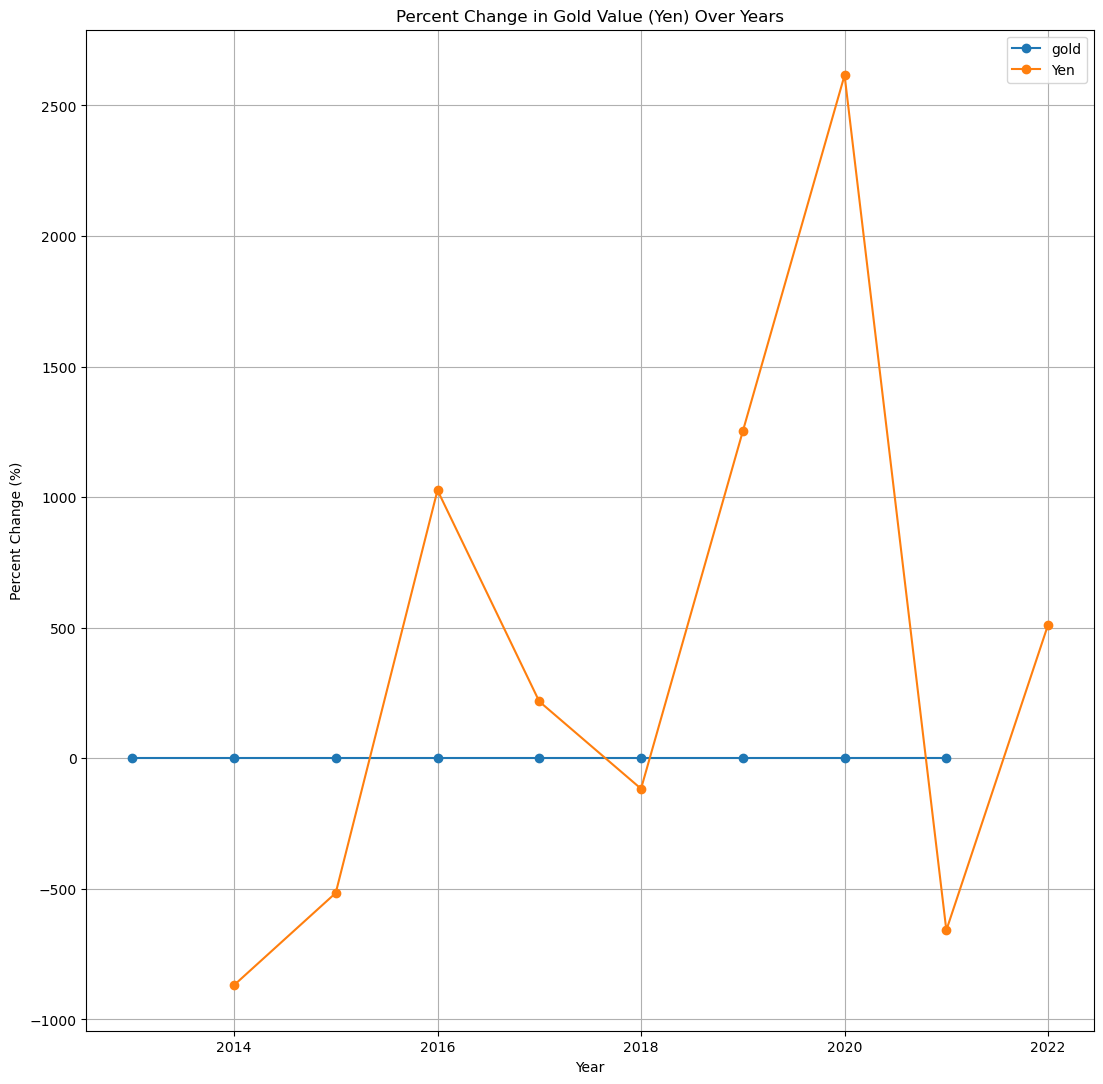

In [33]:
plt.figure(figsize=(13, 13), label = 'InPercentages')

#plt.plot(Yen_change_gold.keys(), Yen_change_gold.values(), marker='o', linestyle='-', label='gold')
#plt.plot(Yen_inflation_change.keys(), Yen_inflation_change.values(), marker='o', linestyle='-', label='Yen')
plt.plot(Yen_currency_change.keys(), Yen_currency_change.values(), marker='o', linestyle='-', label='gold')
plt.plot(currency_change_gold.keys(), currency_change_gold.values(), marker='o', linestyle='-', label='Yen')

#for year, rate in percent_change_gold.items():
 #   plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#for year, rate in Yen_currency_change.items():
#    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')
#for year, rate in currency_change_gold.items():
#    plt.text(year, rate, f'{rate:.2f}', ha='left', va='center', fontsize=8, color='blue')

plt.title('Percent Change in Gold Value (Yen) Over Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True)
plt.show()